
## Image classification using the CIFAR-10 dataset

Useful references and sources:

https://www.kaggle.com/c/cifar-10

https://keras.io/examples/vision/metric_learning/

https://www.kaggle.com/roblexnana/cifar10-with-cnn-for-beginer


# Part 1: Designing and using your own CNN model

## Part 1.1: Setup

### Import Needed Resources / Libraries

In [ ]:
from __future__ import print_function
from tensorflow import keras
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

import random

import tensorflow as tf
from collections import defaultdict
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay

### Load and prepare the data

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the image data
x_train = x_train.astype("float32") / 255.0
y_train = np.squeeze(y_train)
x_test = x_test.astype("float32") / 255.0
y_test = np.squeeze(y_test)

## Part 1.2: Examine Data

In [ ]:
# Number of samples
print("Number of training sample: ",y_train.shape[0])
print("Number of test samples: ", y_test.shape[0])

Number of training sample:  50000
Number of test samples:  10000


In [ ]:
# Number of classes
num_classes = max(y_test)+1
print(num_classes)

10


In [ ]:
# Shape of image data
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


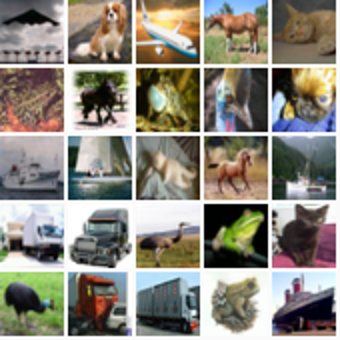

In [ ]:
# Show collage of 25 (randomly selected) images

height_width = 32


def show_collage(examples):
    box_size = height_width + 2
    num_rows, num_cols = examples.shape[:2]

    collage = Image.new(
        mode="RGB",
        size=(num_cols * box_size, num_rows * box_size),
        color=(250, 250, 250),
    )
    for row_idx in range(num_rows):
        for col_idx in range(num_cols):
            array = (np.array(examples[row_idx, col_idx]) * 255).astype(np.uint8)
            collage.paste(
                Image.fromarray(array), (col_idx * box_size, row_idx * box_size)
            )

    # Double size for visualisation.
    collage = collage.resize((2 * num_cols * box_size, 2 * num_rows * box_size))
    return collage


# Show a collage of 5x5 random images.
sample_idxs = np.random.randint(0, 50000, size=(5, 5))
examples = x_train[sample_idxs]
show_collage(examples)

In [ ]:
idx = y_train[0]
print(idx)

6


In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
labels[idx]

'Frog'

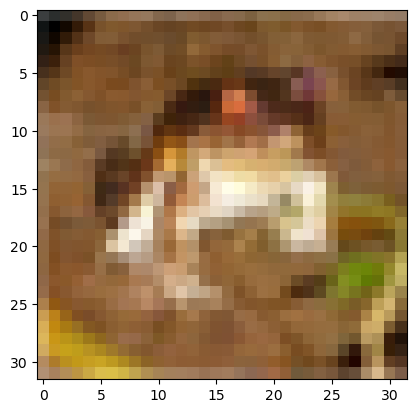

In [ ]:
plt.imshow(x_train[0])

In [ ]:
# Convert class vectors to binary class matrices.
# This is called one-hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0]

6

## **Part 1.3: Design and configure model** *(CNN)*

In this part we will use a convolutional neural network (CNN) built from scratch.


In [ ]:
batch_size = 128
epochs = 10
data_augmentation = False

In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTEN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

## **Part 1.4: Train the model**

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
391/391 [==============================] - 20s 21ms/step - loss: 2.0035 - accuracy: 0.2686 - val_loss: 1.7350 - val_accuracy: 0.3903
Epoch 2/10
391/391 [==============================] - 6s 14ms/step - loss: 1.6880 - accuracy: 0.3902 - val_loss: 1.5372 - val_accuracy: 0.4514
Epoch 3/10
391/391 [==============================] - 5s 13ms/step - loss: 1.5463 - accuracy: 0.4388 - val_loss: 1.4314 - val_accuracy: 0.4838
Epoch 4/10
391/391 [==============================] - 5s 13ms/step - loss: 1.4596 - accuracy: 0.4747 - val_loss: 1.3563 - val_accuracy: 0.5156
Epoch 5/10
391/391 [==============================] - 5s 13ms/step - loss: 1.3978 - accuracy: 0.5009 - val_loss: 1.3489 - val_accuracy: 0.5102
Epoch 6/10
391/391 [==============================] - 5s 14ms/step - loss: 1.3451 - accuracy: 0.5191 - val_loss: 1.2467 - val_accuracy: 0.5590
Epoch 7/10
391/391 [==============================] - 5s 13ms/step - loss: 1.2926 - accuracy: 0.5398 - val_loss: 1.2177 - val_accuracy: 0.569

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


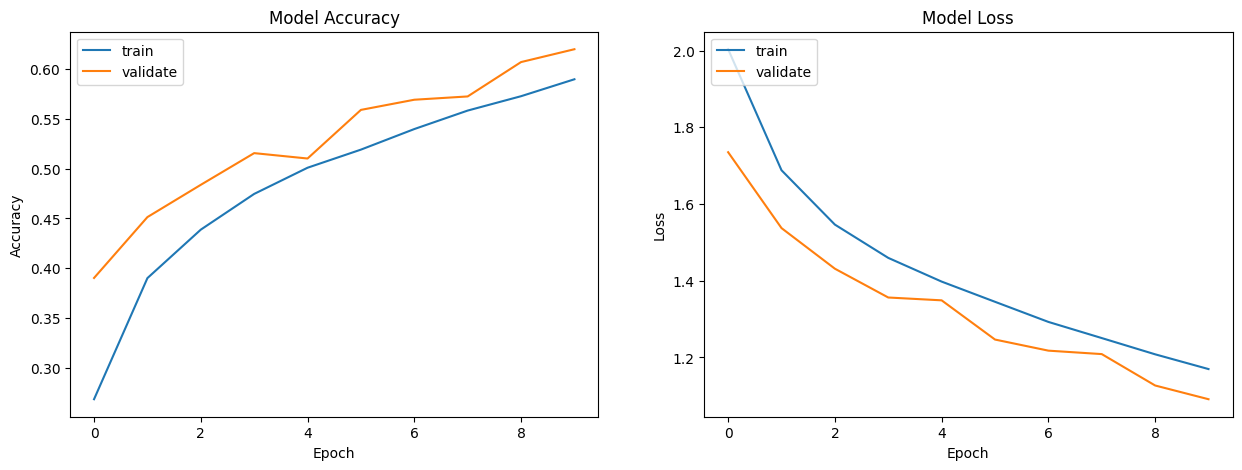

In [ ]:
plotmodelhistory(history)

## **Part 1.5: Evaluate the model**

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0911 - accuracy: 0.6199
Test loss: 1.0911376476287842
Test accuracy: 0.6198999881744385
313/313 [==============================] - 1s 2ms/step


In [ ]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

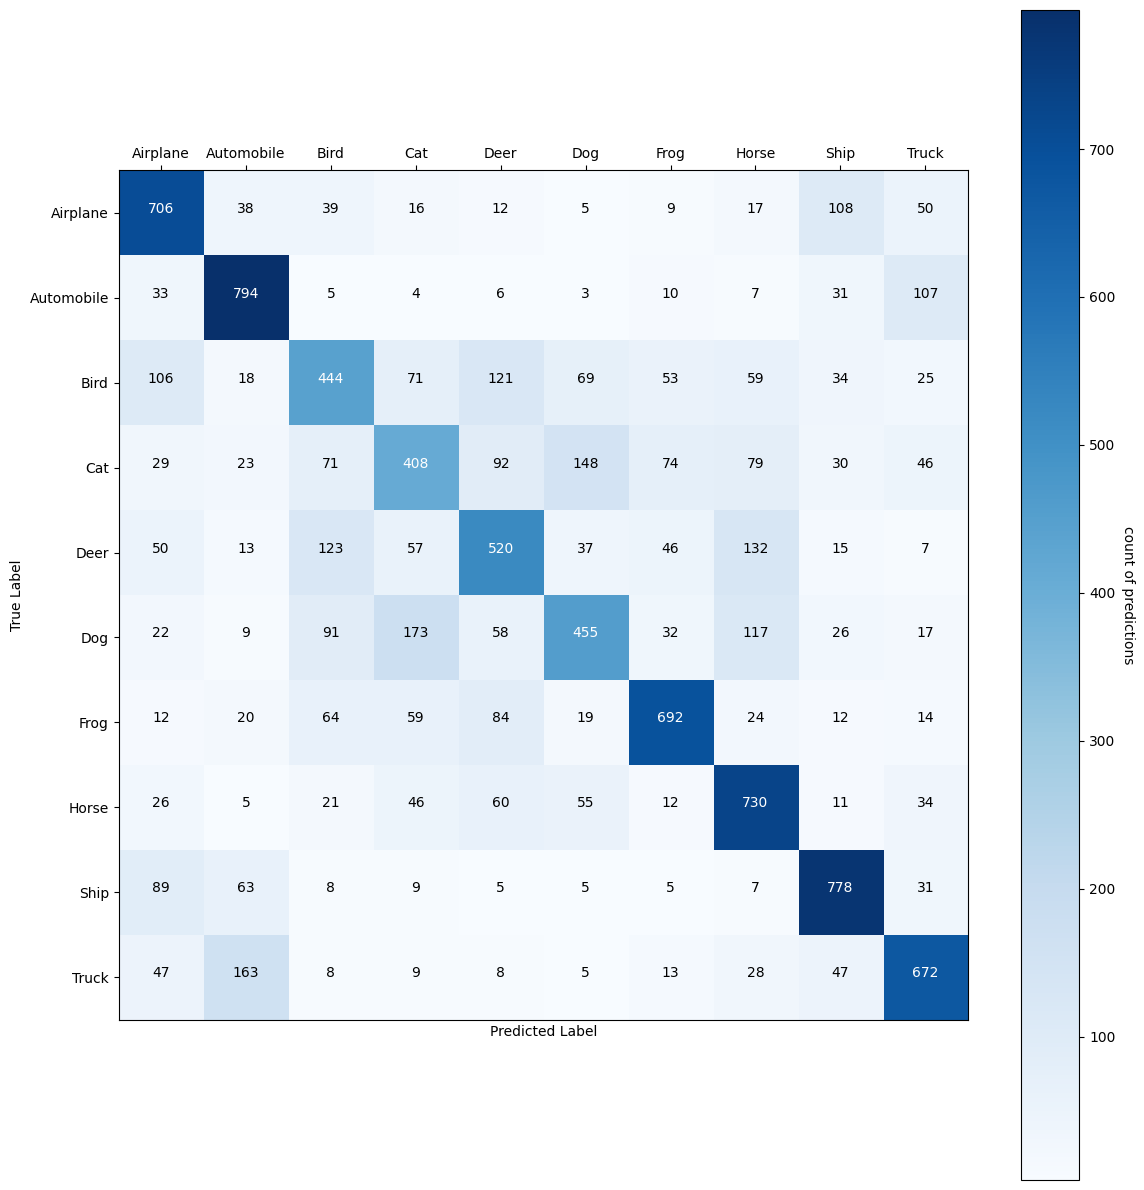

In [ ]:
# Plot confusion matrix

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.74      0.54      0.62      1000
           1       0.63      0.81      0.71      1000
           2       0.58      0.32      0.42      1000
           3       0.50      0.36      0.42      1000
           4       0.53      0.48      0.50      1000
           5       0.59      0.45      0.51      1000
           6       0.58      0.80      0.67      1000
           7       0.58      0.71      0.64      1000
           8       0.67      0.75      0.71      1000
           9       0.55      0.73      0.62      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.58     10000
weighted avg       0.60      0.60      0.58     10000



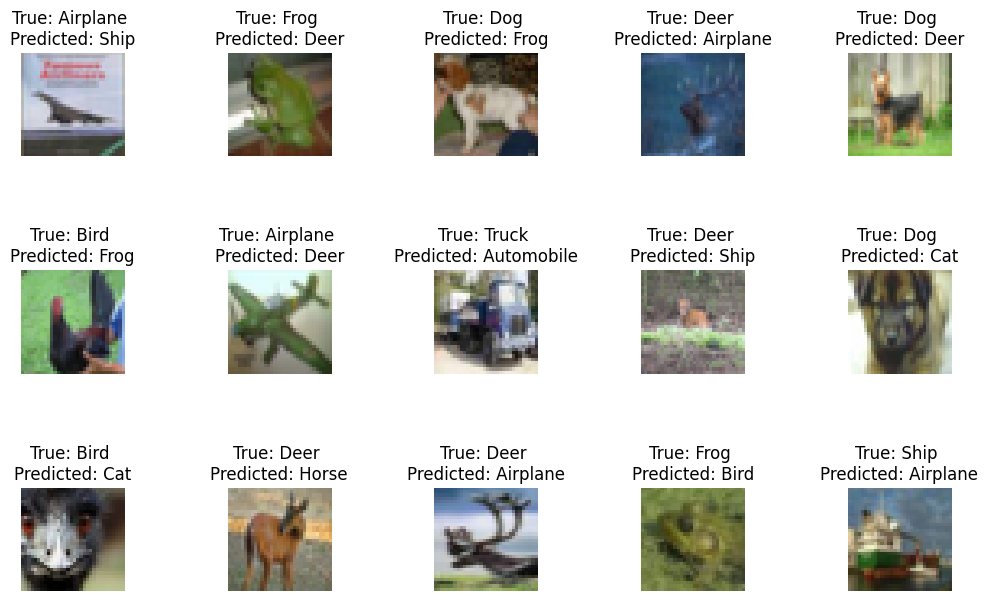

In [ ]:
# Inspect errors
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]],
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [ ]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    predict_x=model.predict(test_image)
    test_result=np.argmax(predict_x,axis=1)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[dict_key],
                                                      labels[Y_true[number]]))

1/1 [==============================] - 0s 161ms/step


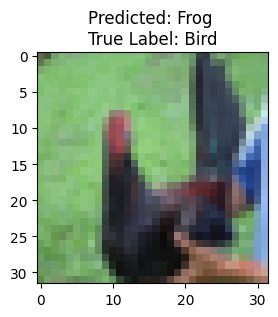

In [ ]:
show_test(25)




 &emsp;**1.1.1** Is the dataset balanced?

 &emsp;**1.1.2** Does your model suffer from overfitting? If so, what would you suggest doing about it?

 &emsp;**1.1.3** Is accuracy a good metric of success in this case? Why (not)?

  &emsp;**1.1.4** What is the baseline accuracy for this dataset/problem?



 Write code to try different combinations of:

 - numbers of hidden layers and units per layer

 - loss functions

 - activation functions

 Please refrain from using better architectures (Vision Transformers, etc.) but feel free to use "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

#### Part 1.1 

 **1.1.1**

   >Is the dataset balanced?

The CIFAR-10 dataset strives to have an equal number of samples in each class since it is balanced. 60,000 32x32 colour photographs, or 6,000 images for each class, make up the dataset. Truck, ship, frog, horse, bird, cat, deer, vehicle, and aeroplane are among the 10 categories. The dataset's class distribution is balanced since each class has an equal representation of photos.

An in-depth explanation of how the CIFAR-10 dataset is balanced.

*  Data Collection:The CIFAR-10 dataset was developed by combining a diverse collection of photographs from various sources. The developers of the dataset ensure that a sufficient number of photographs are collected for each class to ensure balance.
* Class Distribution :The CIFAR-10 dataset is divided into ten classes, with each class representing a different item category. Aeroplanes, autos, birds, cats, deer, dogs, frogs, horses, ships, and trucks are among the classes.

*   Equal Samples: To establish balance, dataset authors ensure that each class has an equal number of samples. In the instance of CIFAR-10, each class has 6,000 photos. This even distribution helps to prevent bias in the dataset and guarantees that each class is represented equally during training and evaluation.
*  Random Sampling: Random sampling techniques are frequently used to select photographs for each class. This method entails choosing photographs at random from the collected pool of images and allocating them to their appropriate classes until the desired number of samples per class is obtained. Random sampling ensures that the dataset is representative of the total population and reduces the possibility of bias.

*   Labelling: After the photographs have been picked and assigned to their respective classes, they are labelled. Each image in the CIFAR-10 dataset is assigned a class label that indicates the category to which it belongs. The labelling method ensures that the photos may be utilised for supervised learning tasks, in which the model learns to classify images based on the labels they have been assigned.







 **1.1.2**
 > Does your model suffer from overfitting? If so, what would you suggest
doing about it?

No this model didnt suffer from over fitting,because based on the below main techniques we can find out model has overifiitng or not.


*  Plot the training and validation loss over epochs to track training and validation loss.When the validation loss increases or stagnates while the training loss keeps decreasing, overfitting is likely the cause.

*   Plot the training and validation accuracy or error rates over epochs to examine learning curves. You can notice that the validation accuracy/error declines or plateaus as the training accuracy/error increases if the model is overfitting.

But in this case

*   During the training process, both the training and validation loss are lowering.

The model is likely learning and generalising effectively to the validation data if both the training and validation loss are lowering during the training process. This is a good sign that, at least up to that stage in the training phase, the model is not overfitted.

The model appears to be performing well on the unseen validation data as well, which suggests that it is generalising well and is not overfitting.



*   During the training process, both the training and validation accuracy increase.
An increasing training accuracy indicates that the model is getting better at predicting the proper labels for the training examples it has encountered. According to the increasing validation accuracy, the model is doing well on the untested validation data, which suggests that it can generalise and make accurate predictions on new, untested situations.

However,Greater training and validation accuracy does not guarantee that overfitting won't occur later in the training cycle.


It's critical to keep in mind that the presence of diminishing training and validation losses doesn't ensure the absence of overfitting later in the training cycle. If the model keeps training for a long time or if the model's capacity is too great for the data given, overfitting may happen.



 **1.1.3**
 > Is accuracy a good metric of success in this case? Why (not)?

The accuracy metric is often used to evaluate the effectiveness of image classification algorithms, including those trained on the CIFAR-10 dataset. It is not the only measure to consider, and whether it is suitable will depend on the specific circumstances and characteristics of the activity.

The percentage of cases that were successfully identified among all examples tells us how accurately a system is classified. It gives a broad overview of the model's performance, but it may not be entirely accurate, especially when working with unbalanced datasets or when incorrectly classifying some classes could have more serious repercussions.

In this case

Accuracy might be a useful measure for assessing the overall performance of the model for CIFAR-10 when each class has an equal number of data. To better understand the behaviour of the model, it is still valuable to consider other metrics.


*   Precision, Recall, and F1-Score: These measures offer a more thorough examination of the model's performance on certain classes, particularly when there is a class imbalance. F1-score combines precision and recall into a single statistic by measuring the coverage of genuine positives as well as the accuracy of positive predictions.
*   A confusion matrix, which offers a tabular comparison of the model's predictions and the actual labels, can be used to assess the distribution of accurate and wrong predictions across a number of classes. It assists in identifying certain confusing or incorrectly categorised regions.


* Accuracy by Class: Analysing the accuracy for each class separately may reveal if the model performs well generally or whether there are some courses in particular where it performs less well.






 **1.1.4**
 > What is the baseline accuracy for this dataset/problem?



*   The CIFAR-10 dataset is a well-known computer vision benchmark. It is made up of 60,000 colour images, each of which is 32x32 pixels in size and belongs to one of ten different groups. There are 50,000 training photos and 10,000 test images in the dataset.
* Baseline accuracy refers to the bare minimum of accuracy that a model must attain in order to be considered better than random guessing on the CIFAR-10 dataset. In other words, it establishes a baseline against which machine learning models' performance on this dataset can be measured.

*  Because CIFAR-10 contains ten separate classifications, random guessing would yield an accuracy of about 10%. This is because, on average, there is a one in ten chance of accurately guessing an image's class label.
*  As a result, the CIFAR-10 dataset's baseline accuracy is roughly 10%. Any model that outperforms this baseline is thought to have learned meaningful patterns and features from the images.





> Write code to try different combinations of:
- numbers of hidden layers and units per layer
- loss functions
- activation functions

>  Please refrain from using better architectures (Vision Transformers, etc.) but feel free to use "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

In [ ]:
#define the convnet
model1 = Sequential()
# CONV-->RELU-->CONV-->RELU-->POOL-->DROPOUT
model1.add(Conv2D(64, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# CONV-->RELU-->CONV-->RELU-->POOL-->DROPOUT
model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# FLATTEN --> DENSE --> RELU --> DROPOUT
model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('sigmoid'))
model1.add(Dropout(0.5))
# a softmax classifier
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 activation_6 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 64)        0         
                                                      

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

# Let's train the model using RMSprop
model1.compile(loss='hinge',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
history1 = model1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/15
391/391 [==============================] - 8s 20ms/step - loss: 0.9754 - accuracy: 0.6304 - val_loss: 0.9790 - val_accuracy: 0.6098
Epoch 2/15
391/391 [==============================] - 8s 20ms/step - loss: 0.9751 - accuracy: 0.6325 - val_loss: 0.9768 - val_accuracy: 0.6243
Epoch 3/15
391/391 [==============================] - 8s 20ms/step - loss: 0.9748 - accuracy: 0.6328 - val_loss: 0.9757 - val_accuracy: 0.6269
Epoch 4/15
391/391 [==============================] - 8s 19ms/step - loss: 0.9746 - accuracy: 0.6337 - val_loss: 0.9757 - val_accuracy: 0.6288
Epoch 5/15
391/391 [==============================] - 8s 21ms/step - loss: 0.9739 - accuracy: 0.6376 - val_loss: 0.9747 - val_accuracy: 0.6347
Epoch 6/15
391/391 [==============================] - 8s 20ms/step - loss: 0.9717 - accuracy: 0.6529 - val_loss: 0.9733 - val_accuracy: 0.6426
Epoch 7/15
391/391 [==============================] - 8s 20ms/step - loss: 0.9713 - accuracy: 0.6541 - val_loss: 0.9722 - val_accuracy: 0.6496

In [ ]:
def plotmodelhistory1(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


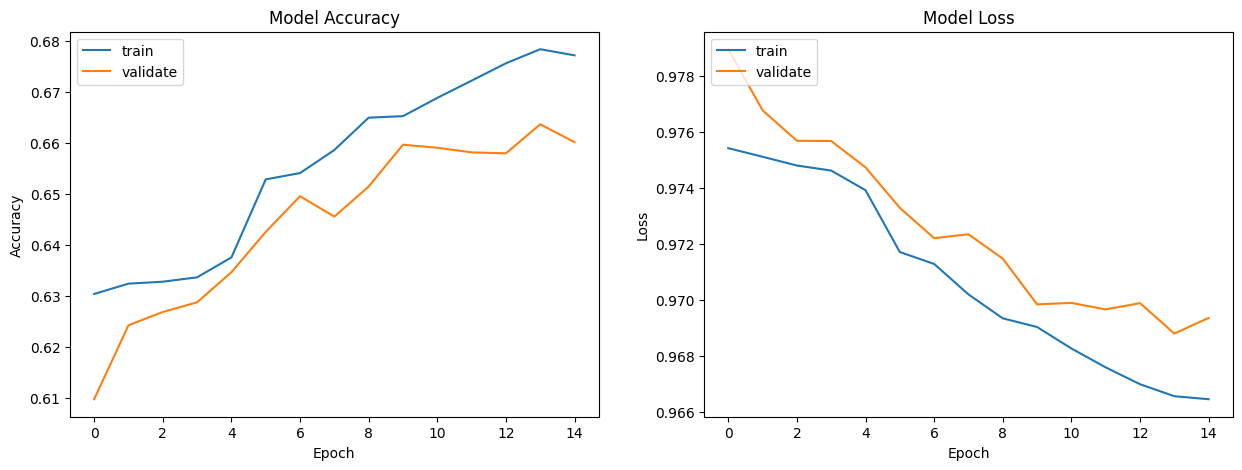

In [ ]:
plotmodelhistory1(history1)

In [ ]:
#Evaluate Model
# Score trained model.
scores = model1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model1.predict(x_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9693 - accuracy: 0.6602
Test loss: 0.9693459868431091
Test accuracy: 0.6601999998092651
313/313 [==============================] - 1s 3ms/step


# **Part 2: Transfer Learning**

## **Part 2.1: Setup**

In [ ]:
from keras import Sequential
from keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout

In [ ]:
#Import dataset (again)
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [ ]:
#Print the dimensions of the datasets to make sure everything's kosher

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#One hot encode the labels.Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
# Lets print the dimensions one more time to see if things changed the way we expected

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


## **Part 2.2: Using ResNet50 as a base model**

Learn more about ResNet50 at: https://www.kaggle.com/keras/resnet50

In [ ]:
base_model_1 = ResNet50(include_top=False,
                        weights='imagenet',
                        input_shape=(32,32,3),
                        classes=y_train.shape[1])

model_1=Sequential()
#Add the Dense layers along with activation and batch normalization
model_1.add(base_model_1)
model_1.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(4000,activation=('relu'),input_dim=512))
model_1.add(Dense(2000,activation=('relu')))
model_1.add(Dense(1000,activation=('relu')))
model_1.add(Dense(500,activation=('relu')))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 4000)              8196000   
                                                                 
 dense_5 (Dense)             (None, 2000)              8002000   
                                                                 
 dense_6 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_7 (Dense)             (None, 500)               500500    
                                                                 
 dense_8 (Dense)             (None, 10)               

In [ ]:
batch_size= 128
epochs=10
learn_rate=.03

sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate)

In [ ]:
# Compile the model
model_1.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Train the model
history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose = 1,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/10
274/274 [==============================] - 30s 79ms/step - loss: 1.2744 - accuracy: 0.5573 - val_loss: 1.8374 - val_accuracy: 0.4599
Epoch 2/10
274/274 [==============================] - 19s 69ms/step - loss: 0.8173 - accuracy: 0.7292 - val_loss: 1.1575 - val_accuracy: 0.6176
Epoch 3/10
274/274 [==============================] - 19s 71ms/step - loss: 0.6394 - accuracy: 0.7863 - val_loss: 1.6841 - val_accuracy: 0.5106
Epoch 4/10
274/274 [==============================] - 19s 68ms/step - loss: 0.5129 - accuracy: 0.8285 - val_loss: 1.0644 - val_accuracy: 0.6691
Epoch 5/10
274/274 [==============================] - 19s 71ms/step - loss: 0.4256 - accuracy: 0.8573 - val_loss: 1.0079 - val_accuracy: 0.6901
Epoch 6/10
274/274 [==============================] - 19s 71ms/step - loss: 0.3591 - accuracy: 0.8822 - val_loss: 1.0549 - val_accuracy: 0.6881
Epoch 7/10
274/274 [==============================] - 19s 71ms/step - loss: 0.2880 - accuracy: 0.9035 - val_loss: 1.2210 - val_accuracy:

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history_1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


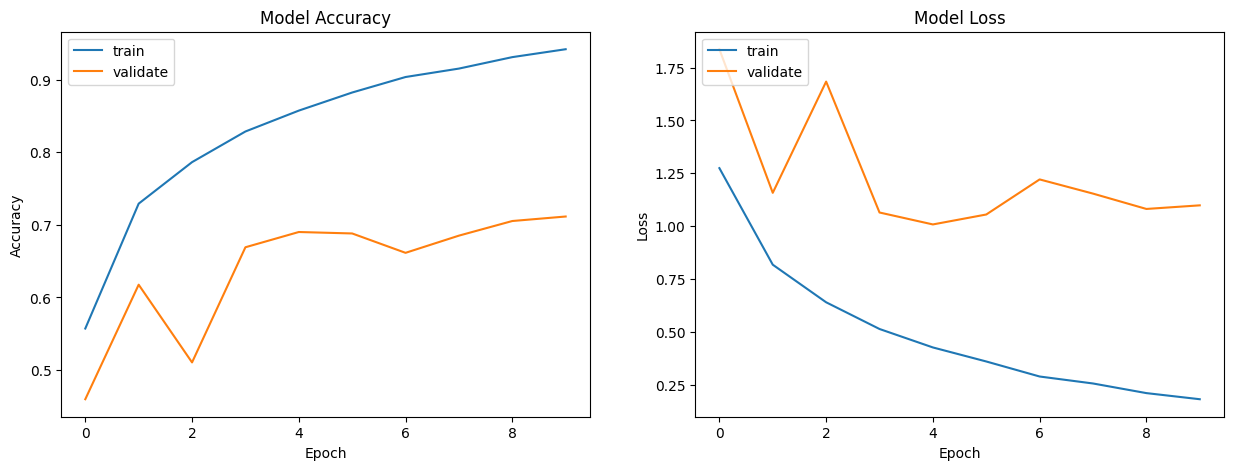

In [ ]:
plotmodelhistory(history_1)

In [ ]:
# Score trained model.
scores = model_1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_1.predict(x_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.1512 - accuracy: 0.7033
Test loss: 1.1512203216552734
Test accuracy: 0.7032999992370605
313/313 [==============================] - 3s 9ms/step


In [ ]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

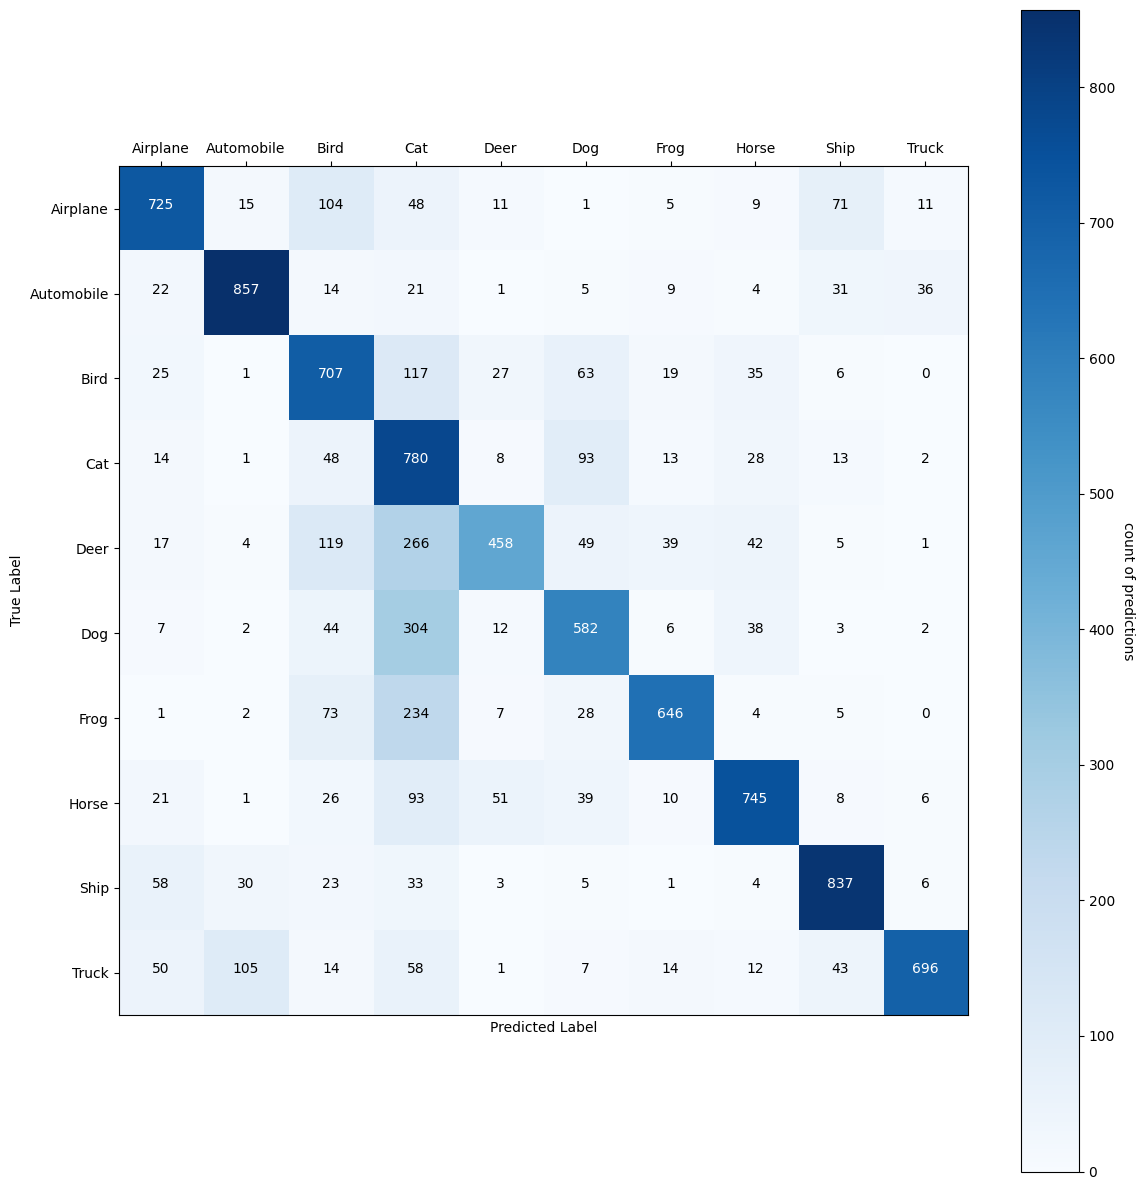

In [ ]:
# Plot confusion matrix

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

### Part 2.3.1: 

Write code to build, train, and evaluate *another* transfer learning model.

Here are a few things you could do:
*   Use a different base model, e.g., VGG19 (see https://www.kaggle.com/keras/vgg19)
*   Add Dropout layers
*   Use data augmentation
*   Change optimizer
*   Change other hyperparameters (learning rate, batch size, etc.)


***write your code in the code cell provided below***


#### **Model 2** 

In [ ]:
# Your code for Part 2.3.1 tasks here and in additional cells as needed for various models you examine

**Learning model--InceptionV3**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [ ]:

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess input data
x_train = tf.image.resize(x_train, (75, 75))
x_test = tf.image.resize(x_test, (75, 75))
x_train = x_train.numpy() / 255.0
x_test = x_test.numpy() / 255.0


y_train = to_categorical(y_train, num_classes=10).reshape((-1, 10))
y_test = to_categorical(y_test, num_classes=10).reshape((-1, 10))


validation_split = 0.1
s_index = int(x_train.shape[0] * (1 - validation_split))
x_val = x_train[s_index:]
y_val = y_train[s_index:]
x_train = x_train[:s_index]
y_train = y_train[:s_index]


# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

datagen.fit(x_train)

#  InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Add a pooling layer, dense and a dropout  layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

batch_size= 64
epochs=10
learn_rate=.03

sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate)


#Compile
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the Model
history_1 =model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

# Evaluating the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/10
704/704 [==============================] - 339s 472ms/step - loss: 1.5526 - accuracy: 0.4607 - val_loss: 1.3096 - val_accuracy: 0.5300
Epoch 2/10
704/704 [==============================] - 364s 517ms/step - loss: 1.4007 - accuracy: 0.5163 - val_loss: 1.2218 - val_accuracy: 0.5690
Epoch 3/10
704/704 [==============================] - 393s 558ms/step - loss: 1.3551 - accuracy: 0.5335 - val_loss: 1.2144 - val_accuracy: 0.5706
Epoch 4/10
704/704 [==============================] - 374s 531ms/step - loss: 1.3079 - accuracy: 0.5528 - val_loss: 1.1877 - val_accuracy: 0.5860
Epoch 5/10
704/704 [==============================] - 374s 531ms/step - loss: 1.2704 - accuracy: 0.5648 - val_loss: 1.2264 - val_accuracy: 0.5724
Epoch 6/10
704/704 [==============================] - 377s 536ms/step - loss: 1.2459 - accuracy: 0.5704 - val_loss: 1.1965 - val_accuracy: 0.5818
Epoch 7/10
704/704 [==============================] - 396s 563ms/step - loss: 1.2087 - accuracy: 0.5848 - val_loss: 1.1866 -

In [ ]:
history=history_1

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()


print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


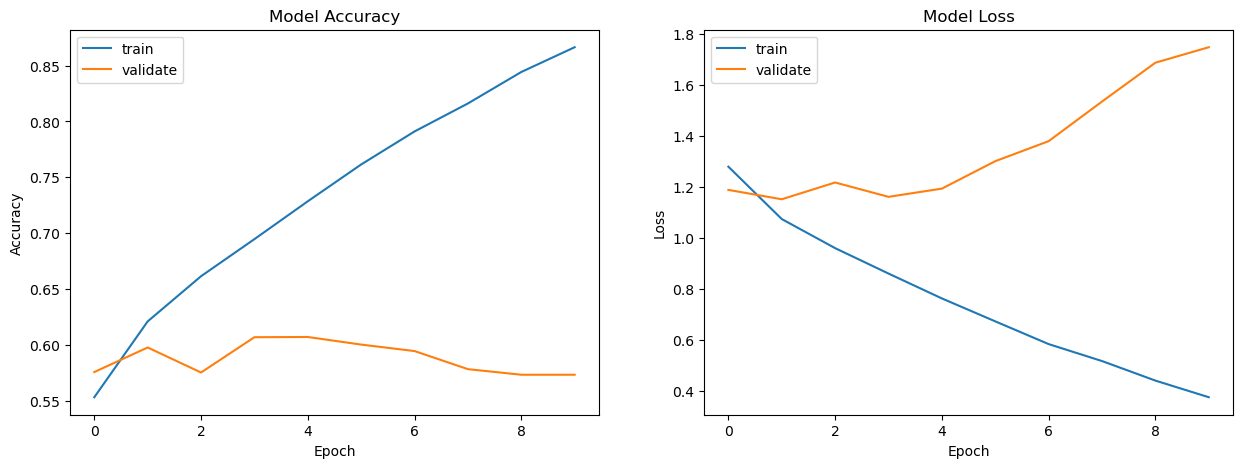

In [ ]:
plotmodelhistory(history)

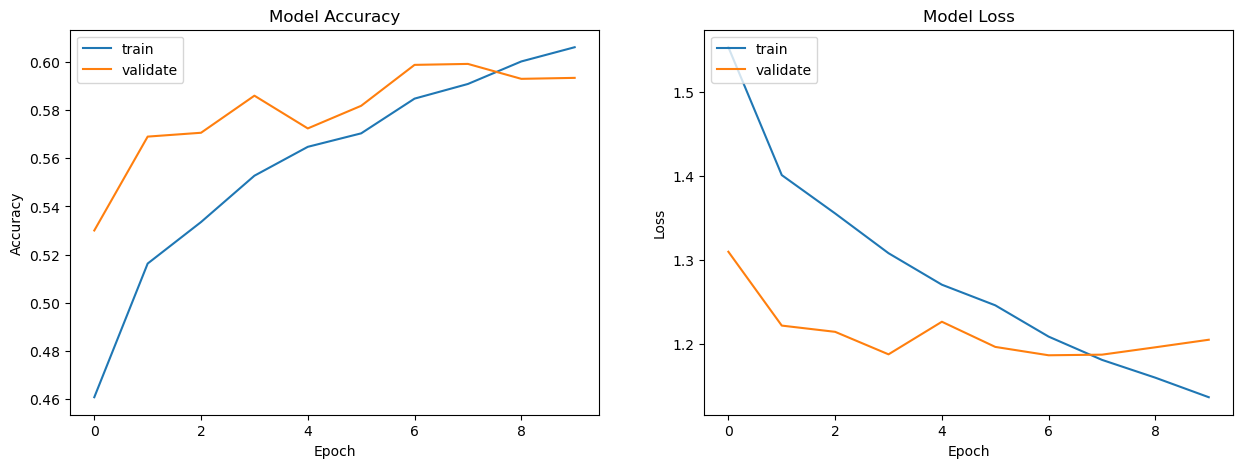

In [ ]:
plotmodelhistory(history)

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 72s 230ms/step - loss: 1.1919 - accuracy: 0.6029
Test loss: 1.1919420957565308
Test accuracy: 0.6029000282287598
313/313 [==============================] - 88s 271ms/step


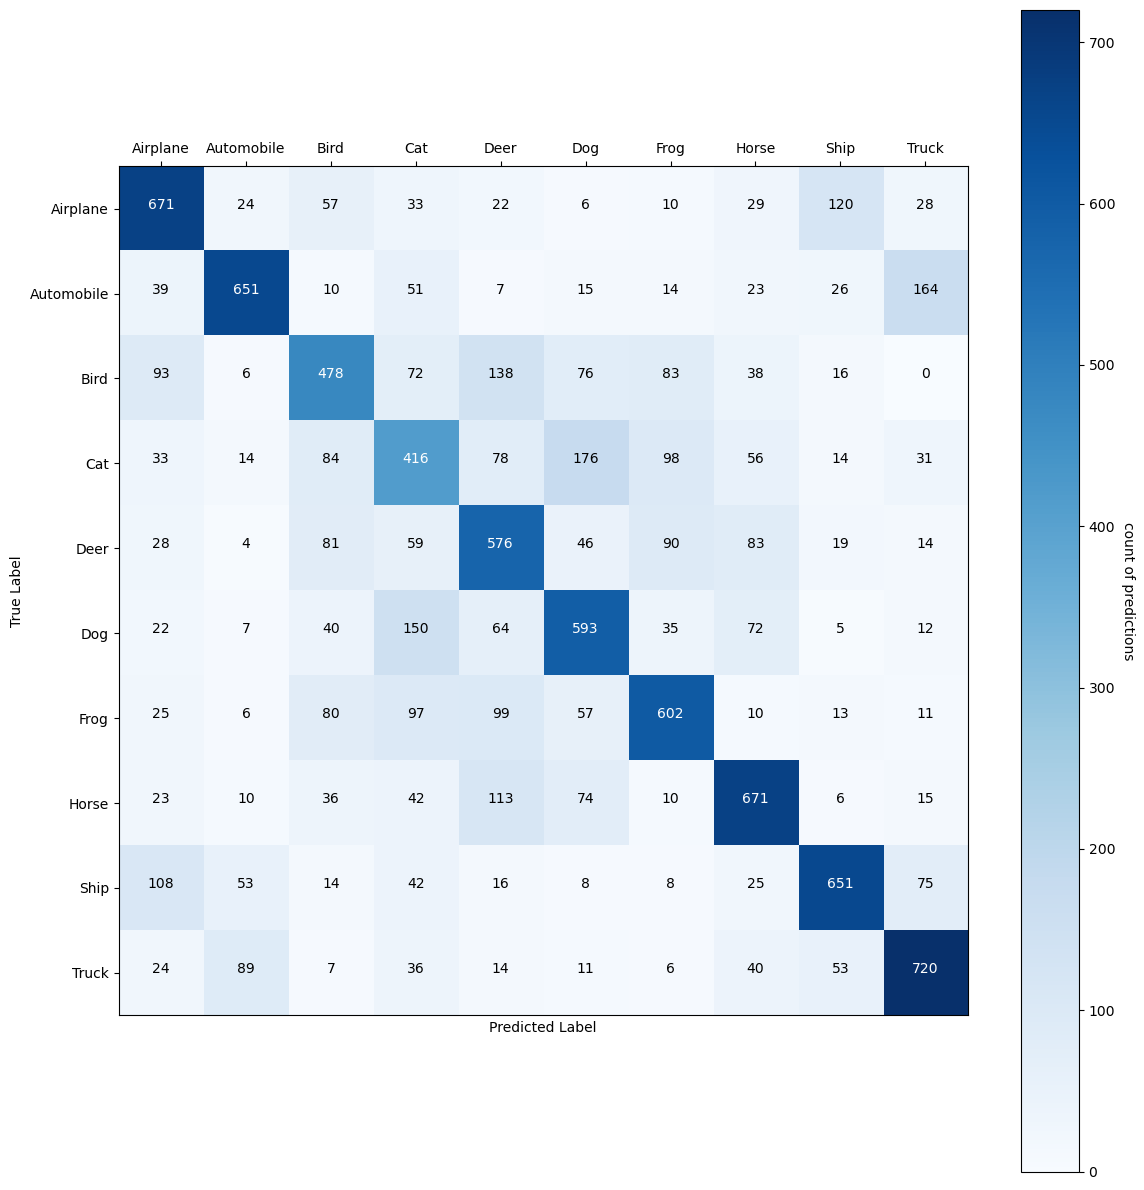

In [ ]:
# Plot confusion matrix

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

### Summary table of results


| Method | Test accuracy | Remarks |
| --- | --- | --- |
| (Part 1) Baseline CNN designed from scratch | 0.5950 | Bad at predicting  cats from dogs |
| (Part 2 - Model 1) Transfer learning using pre-trained CNN (ResNet50) | 0.7311| Test accuracy achieved was low, it is the indications of overfitting |
| (Part 2 - Model 2) Transfer learning using pre-trained CNN (InceptionV3)| 0.6029| Lower accuracy compared to previous methods tried|


## Conclusions

Convolutional Neural Networks (CNNs) have proven to be particularly effective in image classification tasks due to their capacity to collect spatial data and hierarchical representations in images. The CIFAR-10 dataset, which contains 60,000 images from ten different classes, is a prominent benchmark for evaluating image classification systems.

Transfer learning is a technique that takes the knowledge obtained by pre-trained models on large-scale datasets and applies it to new tasks with minimal training data. Pre-trained models such as ResNet50 and InceptionV3, which were trained on the enormous ImageNet dataset, have already learned to recognise a wide range of visual properties. Transfer learning can considerably enhance classification performance on the CIFAR-10 dataset by starting with these pre-trained models.

The CIFAR-10 dataset must be preprocessed before transfer learning can be applied. Normalisation is a phase in the preprocessing process that guarantees the pixel values of the images are scaled to a common range (e.g., 0 to 1) to assist effective training. Furthermore, data augmentation techniques such as random cropping, horizontal flipping, and rotation can be used to artificially increase the diversity of the training data and improve the model's generalizability.

The pre-trained models are tailored to the CIFAR-10 dataset during training by replacing or fine-tuning the final few layers. The earlier layers are often kept frozen to preserve the pre-trained knowledge, while the later layers are changed to suit the unique categorization task. This method enables the model to learn additional class-specific characteristics while maintaining the general representations learnt during pre-training.

During training, optimizers such as stochastic gradient descent (SGD) or Adam are used, coupled with appropriate loss functions such as categorical cross-entropy, to optimise the model's parameters. The optimizers change the network's weights depending on the gradients of the loss function, thereby enhancing the model's ability to accurately identify images.

Following training, the trained models' performance is tested on a separate test set of unseen images. Metrics including as accuracy, precision, recall, and F1-score can be used to evaluate and compare model performance.

Transfer learning utilising pre-trained models greatly decreases training time compared to training from scratch because the models have already acquired useful characteristics. This is especially useful when working with limited training data because it reduces the risk of overfitting and allows the models to achieve higher generalisation.

To summarise, the use of CNNs, transfer learning with pre-trained models such as ResNet50 and InceptionV3, and appropriate preprocessing approaches allows for robust image categorization on the CIFAR-10 dataset. This method can be used to various image classification problems, demonstrating the efficacy and versatility of these tactics in dealing with real-world image identification concerns.